# League of Legends Pro Game Analysis

**Name(s)**: Samuel Lee, Nian-Cin Wang

**Website Link**: (your website link)

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
pd.options.plotting.backend = 'plotly'

## Step 1: Introduction

In [3]:
data = pd.read_csv('2022.csv')
data

/Users/nian-nianwang/miniforge3/envs/dsc80/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148987,9687-9687_game_5,partial,https://lpl.qq.com/es/stats.shtml?bmid=9687,DCup,2022,NaN,0,2022-12-27 12:43:43,5,12.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148988,9687-9687_game_5,partial,https://lpl.qq.com/es/stats.shtml?bmid=9687,DCup,2022,NaN,0,2022-12-27 12:43:43,5,12.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148989,9687-9687_game_5,partial,https://lpl.qq.com/es/stats.shtml?bmid=9687,DCup,2022,NaN,0,2022-12-27 12:43:43,5,12.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148990,9687-9687_game_5,partial,https://lpl.qq.com/es/stats.shtml?bmid=9687,DCup,2022,NaN,0,2022-12-27 12:43:43,5,12.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Data Cleaning and Exploratory Data Analysis

In [4]:
data['league'].unique()

array(['LCKC', 'LPL', 'NLC', 'LVP SL', 'PGC', 'UL', 'PRM', 'LCK', 'LFL',
       'LEC', 'LCS', 'LFL2', 'GLL', 'HM', 'ESLOL', 'EBL', 'LPLOL', 'PGN',
       'LCSA', 'DDH', 'TAL', 'TCL', 'CBLOL', 'LCO', 'LHE', 'GL', 'EL',
       'CBLOLA', 'LMF', 'VL', 'SL (LATAM)', 'LLA', 'HC', 'LDL', 'LJL',
       'PCS', 'VCS', 'UPL', 'LCL', 'NEXO', 'EUM', 'LAS', 'MSI', 'LJLA',
       'CT', 'WLDs', 'CDF', 'IC', 'DCup'], dtype=object)

Change the dtype of the column `patch`

In [5]:
data['patch'].unique()

array([12.01, 12.02, 12.03, 12.04, 12.05, 12.06, 12.07, 12.08, 12.09,
       12.1 , 12.11, 12.12, 12.13, 12.14, 12.15,   nan, 12.16, 12.17,
       12.18, 12.19, 12.2 , 12.21, 12.23])

In [6]:
data['patch'] = data['patch'].astype(str).str.replace(r'^12.1$', '12.10', regex=True).str.replace(r'^12.2$', '12.20', regex=True)

### Keep only Tier 1

In [7]:
tier1 = data[data['league'].isin(['LPL', 'LCK', 'LCS', 'LEC', 'PCS', 'VCS', 'CBLOL', 'LLA', 'LMS', 'LCO', 'LJL'])]
tier1.head(15)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
24,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Player Data

In [8]:
tier1_player = tier1.iloc[[i for i in range(len(tier1)) if i % 12 in range(10)]]
tier1_player

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
24,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133409,ESPORTSTMNT03_2961733,complete,NaN,LLA,2023,NaN,0,2022-09-11 23:09:07,4,12.16,...,149.0,-1338.0,-597.0,-23.0,0.0,0.0,1.0,1.0,1.0,0.0
133410,ESPORTSTMNT03_2961733,complete,NaN,LLA,2023,NaN,0,2022-09-11 23:09:07,4,12.16,...,88.0,-1831.0,-816.0,-1.0,0.0,0.0,1.0,2.0,6.0,0.0
133411,ESPORTSTMNT03_2961733,complete,NaN,LLA,2023,NaN,0,2022-09-11 23:09:07,4,12.16,...,132.0,-1613.0,-209.0,-10.0,0.0,0.0,2.0,1.0,4.0,0.0
133412,ESPORTSTMNT03_2961733,complete,NaN,LLA,2023,NaN,0,2022-09-11 23:09:07,4,12.16,...,124.0,-1663.0,-845.0,1.0,0.0,0.0,1.0,3.0,4.0,0.0


In [9]:
# verification
tier1_player['playername'].head(15)

24       shanji
25          Aki
26        Creme
27         Able
28         COLD
29          New
30        Moyan
31       Feikun
32         Puff
33    Southwind
48       shanji
49          Aki
50        Creme
51         Able
52         COLD
Name: playername, dtype: object

#### Team Data

In [10]:
tier1_team = tier1.iloc[[i for i in range(len(tier1)) if i%12 in {10, 11}]]
tier1_team

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
34,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,8401-8401_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,8401-8401_game_2,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 10:09:22,2,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,8401-8401_game_2,partial,https://lpl.qq.com/es/stats.shtml?bmid=8401,LPL,2022,Spring,0,2022-01-10 10:09:22,2,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,8402-8402_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=8402,LPL,2022,Spring,0,2022-01-10 11:26:11,1,12.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133391,ESPORTSTMNT02_2965321,complete,NaN,LCS,2022,Summer,1,2022-09-11 21:34:49,3,12.15,...,466.0,-195.0,1700.0,21.0,3.0,5.0,4.0,4.0,7.0,3.0
133402,ESPORTSTMNT03_2961731,complete,NaN,LLA,2023,NaN,0,2022-09-11 21:37:14,3,12.16,...,546.0,-2304.0,-1702.0,-40.0,0.0,0.0,3.0,3.0,6.0,0.0
133403,ESPORTSTMNT03_2961731,complete,NaN,LLA,2023,NaN,0,2022-09-11 21:37:14,3,12.16,...,506.0,2304.0,1702.0,40.0,3.0,6.0,0.0,0.0,0.0,3.0
133414,ESPORTSTMNT03_2961733,complete,NaN,LLA,2023,NaN,0,2022-09-11 23:09:07,4,12.16,...,485.0,6878.0,2649.0,29.0,8.0,19.0,0.0,0.0,0.0,8.0


In [11]:
# verification
tier1_team.loc[:, 'pick1':'pick5']

,pick1,pick2,pick3,pick4,pick5
34,Jinx,Jarvan IV,Nautilus,Syndra,Gwen
35,Xin Zhao,Thresh,Aphelios,Vex,Jax
58,Jinx,Xin Zhao,Rakan,Rumble,Corki
59,Lee Sin,Leona,Ziggs,Gangplank,Twisted Fate
82,Jinx,Viego,Thresh,Corki,Graves
...,...,...,...,...,...
133391,Wukong,Lulu,Sivir,Zilean,Gnar
133402,Sivir,Vi,Yuumi,Ornn,Viktor
133403,Wukong,Zeri,Ahri,Rakan,Aatrox
133414,Kalista,Wukong,Nautilus,Vex,Renekton


### Univariate Analysis

#### Number of Games Played in Each Patch
We can see that there were no games played in tier 1 leagues in 12.07, and there were only few games in 12.06, 12.08, and 12.16. It is because that most league spring playoffs happened in 12.05 and 12.06, so there was no game played in 12.07. The Mid-Seasonal Invitational(MSI) was hold during 12.08, so there was few games in 12.08 in tier 1 leagues, as we do not include the international competitions. Same reason apply to 12.16, most league summer playoffs happened in 12.15 and 12.16, and then the Worlds happened in 12.18.

In [12]:
fig1 = tier1_player.groupby('gameid').first()['patch'].value_counts().sort_index().plot(kind='bar')
fig1.update_layout(title='Number of Games Played in Each Patch',
                   xaxis_title='Patch',
                   yaxis_title='Number of games',
                   showlegend=False)
fig1.show()

#### Distribution of Game Length
For the following plot, we can see that the distribution of game length is skewed to the right, with the **median** of **31.39 minutes**.

In [13]:
# Median game length (minutes)
median_time = tier1_player.groupby('gameid').first()['gamelength'].apply(lambda x: x / 60).median()
median_time

31.391666666666666

In [14]:
fig2 = tier1_player.groupby('gameid').first()['gamelength'].apply(lambda x: x / 60).plot(kind='hist')
fig2.add_vline(x=median_time, line_dash="dash", line_color="red")
fig2.add_annotation(x=median_time, y=1.05, text="Median Game Length", showarrow=False, yref="paper")
fig2.update_layout(title='Distribution of Game Length',
                   xaxis_title='Game length (minutes)',
                   yaxis_title='Number of games',
                   showlegend=False)
fig2.show()

### Bivariate Analysis

#### Average Game Length in Each Tier 1 League
From the following boxplot and barplot, we can see that there is no significant game length between each league. One interesting fact is that **LCK**, known for best game strategy in the game with less teamfight, has the longest average game length, while **VCS**, known for its bloody and frequent teamfights, has the shortest average game length.

In [15]:
games = tier1_player.groupby('gameid').first()
games['gamelength'] = games['gamelength'] / 60
fig3 = px.box(data_frame=games, x='league', y='gamelength')
fig3.update_layout(title='Boxplot of Game Length in Each Tier 1 League',
                   xaxis_title='League',
                   yaxis_title='Game Length (minutes)')
fig3.show()

In [16]:
fig4 = games.groupby('league')['gamelength'].mean().sort_values(ascending=False).plot(kind='bar')
fig4.update_layout(title='Average Game Length in Each Tier 1 League',
                   xaxis_title='League',
                   yaxis_title='Average Game Length (minutes)',
                   yaxis_range=[0, 40], 
                   showlegend=False)
fig4.show()

#### Blue / Red Team Win Rate in Each Tier 1 League
From the table and grouped barplot below, we can see that in most leagues (except LCS, LLA, and VCS), **the win rate of blue side is higher than the win rate of red side.** Especially in PCS, the difference of the win rates between blue and red sides is about 0.20, which is a significant amount that can affect the result of the game.

In [17]:
win_rate = tier1_team.groupby(['league', 'side']).mean()['result'].unstack()
win_rate

side,Blue,Red
league,,
CBLOL,0.539095,0.460905
LCK,0.507495,0.492505
LCO,0.514151,0.485849
LCS,0.493464,0.506536
LEC,0.534979,0.465021
LJL,0.514019,0.485981
LLA,0.491979,0.508021
LPL,0.549618,0.450382
PCS,0.605166,0.394834


In [18]:
fig5 = px.bar(win_rate, x=win_rate.index, y=['Blue', 'Red'], barmode='group')
fig5.update_layout(title='Blue / Red Team Win Rate in Each Tier 1 League',
                   xaxis_title='League',
                   yaxis_title='Win Rate',
                   legend_title='Side')
fig5.show()

### Interesting Aggregates

#### Number of Games Played in Each Tier 1 League in 2022
From the plot below, we can see that LPL has the most games played in 2022. This is because they had 17 teams with Single Round Robin and BO3(Best of three) in regular seasons. [(Source)](https://lol.fandom.com/wiki/LPL/2022_Season) The second largest is LCK, which had 10 teams with Double Round Robin and BO3 in regular seasons. [(Source)](https://lol.fandom.com/wiki/LCK/2022_Season)

In [19]:
fig6 = tier1_player.groupby('gameid').first()['league'].value_counts().plot(kind='bar')
fig6.update_layout(title='Number of Games Played in Each Tier 1 League in 2022',
                  xaxis_title='League',
                  yaxis_title='Number of games',
                  showlegend=False)
fig6.show()

#### Most Picked Champions in Each Position
From the pivot table and the plot below, we can see the most played 10 picked champions in each position.

In [20]:
champ_picked = tier1_player.pivot_table(index='position', columns='champion', aggfunc='size', fill_value=0).T
champ_picked = (champ_picked.reindex(columns=['top', 'jng', 'mid', 'bot', 'sup'])
                .rename(columns={'top': 'Top', 'jng': 'Jungle', 'mid': 'Mid', 'bot': 'Bot', 'sup': 'Support'})
                )
champ_picked

position,Top,Jungle,Mid,Bot,Support
champion,,,,,
Aatrox,224,0,1,0,0
Ahri,0,0,886,0,0
Akali,144,0,203,0,0
Akshan,21,0,2,0,0
Alistar,0,0,0,0,270
...,...,...,...,...,...
Zeri,2,0,2,818,0
Ziggs,0,0,5,38,0
Zilean,5,0,40,0,35


In [21]:
for col in champ_picked.columns:
    fig = champ_picked[col].sort_values(ascending=False).iloc[:10].plot(kind='bar', title=col)
    fig.update_layout(title=f'Most Picked 10 Champions in {col}',xaxis_title='Champion', yaxis_title='Number of picks', showlegend=False)
    fig.show()

## Step 3: Assessment of Missingness

### NMAR Analysis

NMAR occurs when the probability of data being missing depends on unobserved information. 

As we focus on data for tier 1, we realize that `url` column in the dataset is missing for some rows.

In [149]:
tier1_team.loc[tier1_team['url'].notnull()]['league'].value_counts()

LPL    1572
LEC      84
LCS       4
LCO       4
LCK       2
PCS       2
Name: league, dtype: int64

In [150]:
tier1_team['league'].value_counts()

LPL      1572
LCK       934
VCS       646
LCS       612
PCS       542
LEC       486
CBLOL     486
LJL       428
LCO       424
LLA       374
Name: league, dtype: int64

From above, we see how the LPL is not missing any urls, while others teams completely do not have any urls or have some.
If LPL consistently provides this URL while other teams vary, it suggests that the missingness is related to the specific teams themselves.
This is NMAR because the presence or absence of a URL linking to match information depends on the team; however, it cannot be recovered by other columns.


This indicate differences in how teams handle data reporting regarding match information. It could also reflect differences in resources, priorities, or organizational policies among the teams.

### Missingness Dependency	

We have two datasets: `tier1_player` and `tier1_team`. We will only use `tier1_team` for later parts, and we will only keep columns that we are interested.

In [23]:
tier1_team.isnull().sum()

gameid                 0
datacompleteness       0
url                 4836
league                 0
year                   0
                    ... 
assistsat15         1572
deathsat15          1572
opp_killsat15       1572
opp_assistsat15     1572
opp_deathsat15      1572
Length: 130, dtype: int64

In [24]:
data = tier1_team[['gameid', 'league', 'year', 'split', 'playoffs', 'date', 'game', 'patch', 'side', 'teamname', 'teamid',
            'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5', 
            'gamelength', 'result', 'kills', 'deaths', 'assists']]
data.head()

,gameid,league,year,split,playoffs,date,game,patch,side,teamname,...,pick1,pick2,pick3,pick4,pick5,gamelength,result,kills,deaths,assists
34,8401-8401_game_1,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,Oh My God,...,Jinx,Jarvan IV,Nautilus,Syndra,Gwen,1365,1,13,6,35
35,8401-8401_game_1,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Red,ThunderTalk Gaming,...,Xin Zhao,Thresh,Aphelios,Vex,Jax,1365,0,6,13,11
58,8401-8401_game_2,LPL,2022,Spring,0,2022-01-10 10:09:22,2,12.01,Blue,Oh My God,...,Jinx,Xin Zhao,Rakan,Rumble,Corki,1444,1,22,9,40
59,8401-8401_game_2,LPL,2022,Spring,0,2022-01-10 10:09:22,2,12.01,Red,ThunderTalk Gaming,...,Lee Sin,Leona,Ziggs,Gangplank,Twisted Fate,1444,0,8,22,16
82,8402-8402_game_1,LPL,2022,Spring,0,2022-01-10 11:26:11,1,12.01,Blue,FunPlus Phoenix,...,Jinx,Viego,Thresh,Corki,Graves,1893,1,12,8,25


From the following code block, we can see that missingness values exist in `split`, `ban`, `pick` columns, so we are going to examine further.

In [25]:
data.isnull().sum()

gameid          0
league          0
year            0
split         166
playoffs        0
date            0
game            0
patch           0
side            0
teamname        0
teamid          0
ban1            7
ban2            4
ban3           14
ban4           16
ban5           28
pick1          42
pick2          42
pick3          42
pick4          42
pick5          42
gamelength      0
result          0
kills           0
deaths          0
assists         0
dtype: int64

Since the pick1 - pick5 columns have the same number of missing values, it looks that they are missing together.

From the dataframe below, there is only one game (two rows, blue and red) that has nan in pick columns is from LPL 2022 Spring Regular Season, but the others are from VCS 2022 Summer Regular Season.

In [26]:
data[data['pick1'].isnull()].groupby(['league', 'year', 'split', 'playoffs']).size()

league  year  split   playoffs
LPL     2022  Spring  0            2
VCS     2022  Summer  0           40
dtype: int64

From the below, we can see that those ban columns usually only have one nan value in the row (except for 8473-8473_game_1, which is the game from LPL mentioned above), so we would like to carry out permutation tests to test if the `ban1` to `ban5` columns are dependent to the `side` column.

In [27]:
data[data.loc[:,'ban1': 'ban5'].isnull().any(axis=1)].loc[:, :'ban5']

,gameid,league,year,split,playoffs,date,game,patch,side,teamname,teamid,ban1,ban2,ban3,ban4,ban5
1487,ESPORTSTMNT01_2690705,LCK,2022,Spring,0,2022-01-12 10:07:10,1,12.01,Red,Kwangdong Freecs,oe:team:0b65555ba9e97910fc1e7264a99fa24,Renekton,Twisted Fate,Vex,Jayce,NaN
2507,ESPORTSTMNT01_2691557,LCK,2022,Spring,0,2022-01-14 13:00:25,3,12.01,Red,T1,oe:team:ce499dea30cfce118f4fe85da0227e8,Lee Sin,Renekton,NaN,Camille,LeBlanc
10642,ESPORTSTMNT02_2552213,CBLOL,2022,Split 1,0,2022-01-29 18:14:54,1,12.02,Blue,KaBuM! e-Sports,oe:team:9dced510f02f8586ee7501922484ac0,Renekton,Twisted Fate,Viego,Yuumi,NaN
14854,ESPORTSTMNT02_2576641,LCO,2022,Split 1,0,2022-02-07 06:43:48,1,12.02,Blue,Gravitas,oe:team:4889684df277c6008eb89f48f94bded,Gwen,Jarvan IV,Senna,NaN,NaN
19786,ESPORTSTMNT02_2558786,VCS,2022,Spring,0,2022-02-13 10:43:35,2,12.02,Blue,SBTC Esports,oe:team:31df330ccc0f1b3b521959a24288ac4,Corki,LeBlanc,Viktor,NaN,Braum
24539,8468-8468_game_1,LPL,2022,Spring,0,2022-02-18 07:23:05,1,12.02,Red,Rare Atom,oe:team:8516ca63facc91286d6c00212ca945e,Zeri,Renekton,NaN,Hecarim,Camille
25738,8473-8473_game_1,LPL,2022,Spring,0,2022-02-19 11:34:46,1,12.02,Blue,JD Gaming,oe:team:b42d0f31f2727621b963042276817c4,NaN,NaN,NaN,NaN,NaN
25739,8473-8473_game_1,LPL,2022,Spring,0,2022-02-19 11:34:46,1,12.02,Red,Top Esports,oe:team:fcec508e780bbd1ad493852640f5b36,NaN,NaN,NaN,NaN,NaN
26242,ESPORTSTMNT03_2547408,PCS,2022,Spring,0,2022-02-20 07:51:56,1,12.03,Blue,SEM9,oe:team:5e3055ed3b815352627fec92727dfe6,Akali,Aphelios,NaN,Nautilus,Zoe
26327,ESPORTSTMNT03_2547435,LCK,2022,Spring,0,2022-02-20 09:40:04,3,12.03,Red,KT Rolster,oe:team:d723992568441c6bafa2658129eade7,Twisted Fate,Zeri,NaN,Viktor,Vex


### Permutation Tests
- test statistic: total variation distance
- p-value cutoff: 0.05

In [28]:
# only keep the side and ban columns for this part
ban_data = data.loc[:, ['side','ban1', 'ban2', 'ban3', 'ban4', 'ban5']]
for col in ban_data.columns[1:]:
    ban_data[col] = ban_data[col].isna()
ban_data

,side,ban1,ban2,ban3,ban4,ban5
34,Blue,False,False,False,False,False
35,Red,False,False,False,False,False
58,Blue,False,False,False,False,False
59,Red,False,False,False,False,False
82,Blue,False,False,False,False,False
...,...,...,...,...,...,...
133391,Red,False,False,False,False,False
133402,Blue,False,False,False,False,False
133403,Red,False,False,False,False,False
133414,Blue,False,False,False,False,False


In [29]:
# write a helper function to help us loop through the 5 columns
def pt_ban(col, n):
    pt_observed = ban_data[['side', col]].pivot_table(index=col, columns='side', aggfunc='size', fill_value=0)
    pt_observed = pt_observed / pt_observed.sum()
    observed_tvd = pt_observed.diff(axis=1).iloc[:, -1].abs().sum() / 2
    shuffled = ban_data.copy()[['side', col]]

    tvds = []
    for _ in range(n):
        shuffled[col] = np.random.permutation(shuffled[col])
        pivoted = shuffled.pivot_table(index=col, columns='side', aggfunc='size', fill_value=0)
        pivoted = pivoted / pivoted.sum() 
        tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
        tvds.append(tvd)
    p_value = (np.array(tvds) >= observed_tvd).mean()
    return tvds, observed_tvd, p_value

In [30]:
for col in ban_data.columns[1:]:
    tvds, observed_tvd, p_value = pt_ban(col, 1000)
    fig = px.histogram(tvds, histnorm='probability', title=f'Empirical Distribution of the TVD for {col}')
    fig.add_vline(x=observed_tvd, line_dash="dash", line_color="red")
    fig.add_annotation(x=observed_tvd, y=1.1, text=f"Observed TVD; p-value: {p_value}", showarrow=False, yref="paper")
    fig.show()

From the graph above, we can see that the p-values of the permutation tests for 5 ban columns are **much larger than 0.05**, which means that the missingness in the ban columns are **not dependent** on the side of the team.

However, is the missingness of ban1 column related to missingness of ban2, ban3, ban4, and/or ban 5? We can perform another permutation test to answer this question.

In [31]:
# write a helper function to help us loop through the 5 columns
def pt_ban1(col, n):
    pt_observed = ban_data[['ban1', col]].pivot_table(index=col, columns='ban1', aggfunc='size', fill_value=0)
    pt_observed = pt_observed / pt_observed.sum()
    observed_tvd = pt_observed.diff(axis=1).iloc[:, -1].abs().sum() / 2
    shuffled = ban_data.copy()[['ban1', col]]

    tvds = []
    for _ in range(n):
        shuffled[col] = np.random.permutation(shuffled[col])
        pivoted = shuffled.pivot_table(index=col, columns='ban1', aggfunc='size', fill_value=0)
        pivoted = pivoted / pivoted.sum() 
        tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
        tvds.append(tvd)
    p_value = (np.array(tvds) >= observed_tvd).mean()
    return tvds, observed_tvd, p_value

In [32]:
for col in ban_data.columns[2:]:
    tvds, observed_tvd, p_value = pt_ban1(col, 1000)
    fig = px.histogram(tvds, histnorm='probability', title=f'Empirical Distribution of the TVD for {col}')
    fig.add_vline(x=observed_tvd, line_dash="dash", line_color="red")
    fig.add_annotation(x=observed_tvd, y=1.1, text=f"Observed TVD; p-value: {p_value}", showarrow=False, yref="paper")
    fig.show()

Therefore, from the above plots, it is clear that the missingness of `ban1` is related to the missingness of other `ban` columns, which confirms our previous observation that there is at most one nan value in a single row for most of the games.

## Step 4: Hypothesis Testing

- Null hypothesis: The win rates of teams on the Blue and Red sides are equal.
- Alternative hypothesis: The win rate of teams on the Blue side is higher than the win rate of teams on the Red side.
- Test statistic: The difference in proportions of win games between the Blue and Red sides.
- Significant Level(p-value cutoff): 0.05
- We will perform permutation test to test the hypothesis.

In [33]:
side_data = data[['side', 'result']]
side_data

,side,result
34,Blue,1
35,Red,0
58,Blue,1
59,Red,0
82,Blue,1
...,...,...
133391,Red,1
133402,Blue,1
133403,Red,0
133414,Blue,1


In [34]:
side_data.groupby('side').mean().loc['Blue'].values[0]

0.5276752767527675

In [35]:
observed_diff = side_data.groupby('side').mean().loc['Blue'].values[0] - side_data.groupby('side').mean().loc['Red'].values[0]
observed_diff

0.05535055350553503

In [36]:
N = 1000
diff_props = []
for _ in range(N):
    shuffled = side_data.copy()
    shuffled['side'] = np.random.permutation(shuffled['side']) # shuffle the side column
    diff_prop = shuffled.groupby('side').mean().loc['Blue'].values[0] - shuffled.groupby('side').mean().loc['Red'].values[0]
    diff_props.append(diff_prop)
diff_props[0:10]

[0.031365313653136495,
 0.009225092250922495,
 -0.0006150061500615478,
 -0.00799507995079951,
 -0.006150061500614978,
 -0.004920049200491994,
 -0.008610086100861059,
 0.0012300123001229846,
 -0.023370233702336984,
 -0.017835178351783554]

In [37]:
p_value = (np.array(diff_props) >= observed_diff).mean()
p_value

0.0

In [38]:
fig = px.histogram(diff_props, histnorm='probability', title=f'Empirical Distribution of the test statistic (Difference in Proportions)')
fig.add_vline(x=observed_diff, line_dash="dash", line_color="red")
fig.add_annotation(x=observed_diff, y=1.1, text=f"Observed test statistic", showarrow=False, yref="paper")
fig.show()

Since the p-value is less than the significant level (0.05), we reject our null hypothesis. From our test, the win rate of teams on the Blue side is higher than the win rate of teams on the Red side.

## Step 5: Framing a Prediction Problem

We hope to predict if the team will win.

## Step 6: Baseline Model

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [40]:
X = data[['pick1', 'pick2', 'pick3', 'pick4', 'pick5', 'result']].dropna()
y = X['result']
X = X.drop(columns='result')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
import json

class ChampOneHotEncoder(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.champion_lst = json.load(open("./champion_list.json", "r"))['champions']
        return self

    def transform(self, X, y=None):

        try:
            getattr(self, "champion_lst")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")

        df = pd.DataFrame(X)
        def helper(row):
            tran_rows = []
            for col in row:
                champ_dict = {champ: 0 for champ in self.champion_lst}
                if col in self.champion_lst:
                    champ_dict[col] = 1
                tran_rows.append(pd.Series(champ_dict))
            return pd.concat(tran_rows)
        return df.apply(helper, axis=1)

In [42]:
ctf = ColumnTransformer([
    ('champ_one_hot', ChampOneHotEncoder(), ['pick1', 'pick2', 'pick3', 'pick4', 'pick5'])
    ], remainder='passthrough')

In [43]:
pl = make_pipeline(ctf, DecisionTreeClassifier(max_depth=5)).fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)

(0.5244728187270266, 0.4756380510440835)

From the test score, we can see that the accuracy of the model is even lower than random chance (p = 0.50). Therefore, we need to include new features and change our feature engineering process.

## Step 7: Final Model

For this part, we are going to include the `side` column as a new feature to predict the result of the game because we think that side selection can affect the result. As we demostrated earlier, the win rate of blue side is higher than the win rate of red side.

For feature engineering part, we would like to add the feature of pick rate of each champion because this can provide more information about the strength of individual champions.

In [44]:
X = data[['side', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5', 'result']].dropna()
y = X['result']
X = X.drop(columns='result')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin
import json

class ChampCustomTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        df = pd.DataFrame(X)
        self.champion_lst = json.load(open("./champion_list.json", "r"))['champions']
        self.pick_rate_dict = (df.loc[:, 'pick1':'pick5'].stack().value_counts(normalize=True) * 100).to_dict()
        return self

    def transform(self, X, y=None):

        try:
            getattr(self, "champion_lst")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")

        df = pd.DataFrame(X)
        def helper(val):
            if val in self.pick_rate_dict:
                return self.pick_rate_dict[val]
            else: return 0
        new_df = pd.DataFrame()
        for col in df.loc[:, 'pick1':'pick5']:
            new_df[f"{col}_pick_rate"] = df[col].apply(helper)
        def helper2(row):
            result = {champ: 0 for champ in self.champion_lst}
            for col in row:
                result[col] += 1
            return pd.Series(result)
        df = pd.concat([ new_df, df.apply(helper2, axis=1)], axis=1)

        return df

In [46]:
ctf = ColumnTransformer(
    [('side_one_hot', OneHotEncoder(), ['side']),
     ('champ_custom', ChampCustomTransformer(), ['pick1', 'pick2', 'pick3', 'pick4', 'pick5']),
     ], remainder='passthrough')

In [47]:
pl = make_pipeline(ctf, DecisionTreeClassifier(max_depth=5)).fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)

(0.5563938866318436, 0.5150812064965197)

After the engineering part, we can see that the accuracy improves a little bit. We are going to find the best hyperparameters for our model.

In [48]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'clf__max_depth': np.arange(1, 21),
    'clf__min_samples_split': np.arange(2, 21, 2)
}
pl = Pipeline([
    ('ctf', ctf),
    ('clf', DecisionTreeClassifier())
])

grid_search = GridSearchCV(pl, hyperparameters, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'clf__max_depth': 6, 'clf__min_samples_split': 18}

From the GridSearchCV, we can see that the best hyperparameters are the max_depth of **8**  and the min_samples_split of **6**.

In [49]:
grid_search.score(X_train, y_train), grid_search.score(X_test, y_test)

(0.5666473205649062, 0.5406032482598608)

However, the test score after we performed GridSearchCV is even worse than our first try. Therefore, we need to find the hyperparameters manually.

In [50]:
train_scores = {}
test_scores = {}
for i in range(1, 16):
    for j in range(2, 17, 2):
        pl = Pipeline([
        ('ctf', ctf),
        ('clf', DecisionTreeClassifier(max_depth=i,  min_samples_split=j, criterion='entropy'))
        ])
        pl.fit(X_train, y_train)
        train_scores[(i, j)] = (pl.score(X_train, y_train))
        test_scores[(i, j)] = (pl.score(X_test, y_test))

After running through different hyperparameters, we can see that the best hyperparameters are the max_depth of 4 and the min_samples_split of 4.

In [51]:
max(test_scores, key=test_scores.get), max(test_scores.values())

((4, 10), 0.5545243619489559)

Therefore, the final model we use is the following:

In [52]:
ctf = ColumnTransformer(
    [('side_one_hot', OneHotEncoder(), ['side']),
     ('champ_custom', ChampCustomTransformer(), ['pick1', 'pick2', 'pick3', 'pick4', 'pick5']),
     ], remainder='passthrough')
pl = Pipeline([
    ('ctf', ctf),
    ('clf', DecisionTreeClassifier(max_depth=4,  min_samples_split=4, criterion='entropy'))
])
pl.fit(X_train, y_train)
pl.score(X_train, y_train), pl.score(X_test, y_test)

(0.5333720255368544, 0.5537509667440061)

## Step 8: Fairness Analysis

For conducting fairness analysis, I want to compare whether the model works equally for both blue and red side. 

As our hypothesis testing concluded that we cannot be sure if their side has an effect on winning, I want to further compare the performances between these two groups.

In [73]:
from sklearn import metrics

In [75]:
y_pred = pl.predict(X_test)

metrics.confusion_matrix(y_test, y_pred)

array([[609,  76],
       [501, 107]])

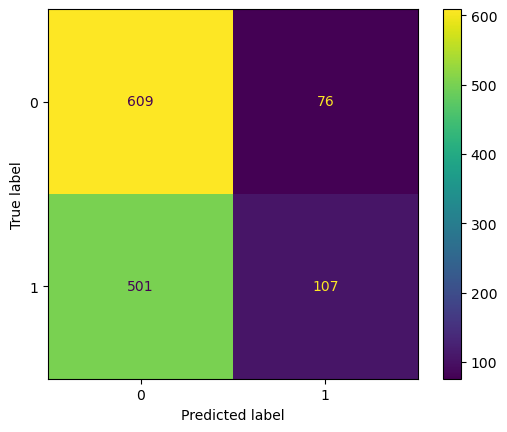

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(pl, X_test, y_test);
plt.grid(False)

With consideration that teams may consider selecting champions as one important factor to winning a match, cost of false positive of high. It is worse than false negative, where we predict them to lose while they actually won the match during the game. The grid above also shows out of 183 times, 76 teams actually lost when our model predicted them to win. Therefore, we decide to evalue our model's performance on **precision**.

In [77]:
metrics.precision_score(y_test, y_pred)

0.5846994535519126

In [100]:
results = X_test.copy()
results['prediction'] = y_pred
results['tag'] = y_test

def false_positive_rate(group):
    return 1 - metrics.precision_score(group['tag'], group['prediction'])

false_positives = (
    results
    .groupby('side')
    .apply(lambda x: 1 - metrics.precision_score(x['tag'], x['prediction']))
    .reset_index(name='False Positive Rate')
)

# Plot using Plotly Express
fig = px.bar(
    false_positives,
    x='side',
    y='False Positive Rate',
    title='False Positive Rate by Team',
)

fig.show()

There seems to be some disparities...

We now run a hypothesis test to check if the difference is statistically significant.

- **Null Hypothesis:** The precision of the model for teams on the blue side and red side are roughly the same, and any differences are due to random chance.
- **Alternative Hypothesis:** The precision of the model for teams on the blue side is greather than its precision for teams on the red side.
- Cutoff: 0.05
- We will perform permutation testing to test our hypothesis

In [108]:
y_pred_blue = pl.predict(X_test[X_test['side'] == 'Blue'])
y_pred_red = pl.predict(X_test[X_test['side'] == 'Red'])

precision_blue = metrics.precision_score(y_test[X_test['side'] == 'Blue'], y_pred_blue)
precision_red = metrics.precision_score(y_test[X_test['side'] == 'Red'], y_pred_red)

In [117]:
observed_diff = precision_blue - precision_red
observed_diff

0.5879120879120879

In [118]:
num_permutations = 1000
precision_diff_permuted = []
for _ in range(num_permutations):
    shuffled_sides = np.random.permutation(X_test['side'])
    precision_blue_permuted = metrics.precision_score(y_test[shuffled_sides == 'Blue'], y_pred_blue)
    precision_red_permuted = metrics.precision_score(y_test[shuffled_sides == 'Red'], y_pred_red)
    precision_diff_permuted.append(precision_blue_permuted - precision_red_permuted)

precision_diff_permuted[:10]

[-0.5659340659340659,
 -0.48901098901098905,
 0.4725274725274725,
 0.4945054945054945,
 0.44505494505494503,
 -0.532967032967033,
 0.4945054945054945,
 0.45604395604395603,
 -0.5494505494505495,
 -0.543956043956044]

In [119]:
fig = px.histogram(x=precision_diff_permuted, nbins=50, title='Difference in Precision (Group X - Group Y)')
fig.add_vline(x=observed_diff, line_color='red', annotation_text=f'Observed Difference: {observed_diff:.4f}')
fig.show()

In [120]:
p_value = np.mean(np.abs(precision_diff_permuted) >= np.abs(observed_diff))
p_value

0.028

Our p-values is 0.024. Blue side having a higher precision than the red side is significant.